In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


df = pd.read_csv("titanic-data.csv")

# preview train data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape #dimensions of the data

(891, 12)

In [3]:
df.describe() #Summarise the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum() #check for any missing/null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since there are missing values in the dataset, I will replace the missing values as follows:
1. Age will be replaced by the mean of Age
2. Cabin column will be dropped from the dataset completely since every passenger will have their unique cabins and thus, it would be hard to impute individual cabins
3. The 2 missing rows for Embarked will be dropped


In [5]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df = df.dropna(subset=['Embarked'])
df = df.drop('Cabin', axis = 1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Next, the columns which are discrete to each passenger will be removed as they do not contribute towards the significance of their survival rate

In [6]:
df = df.drop(columns = ['Name','PassengerId','Ticket'], axis = 1)

Now, to convert the 'Sex' and 'Embarked' varibles into numerical format, I will use the 'map' function to transform text to numbers

In [7]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

<AxesSubplot:>

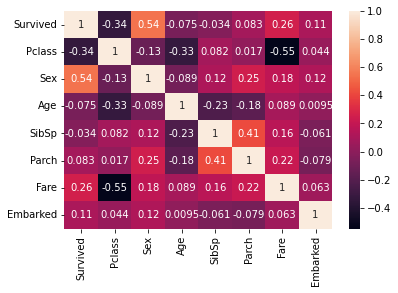

In [8]:
sns.heatmap(df.corr(), annot = True)

From the correlation heatmap observed above, it can be inferred that Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare and, location of aboarding the ship do not contribute significantly towards the survival of the passengers.

In [9]:
df = df.drop(columns = ['Parch','SibSp','Age'], axis = 1)
df


,Survived,Pclass,Sex,Fare,Embarked
0,0,3,0,7.2500,0
1,1,1,1,71.2833,1
2,1,3,1,7.9250,0
3,1,1,1,53.1000,0
4,0,3,0,8.0500,0
...,...,...,...,...,...
886,0,2,0,13.0000,0
887,1,1,1,30.0000,0
888,0,3,1,23.4500,0
889,1,1,0,30.0000,1


In [10]:
df.shape

(889, 5)

I will now construct some data visualisations to derive some quick insights about the data

C:\Users\HP PAVILION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

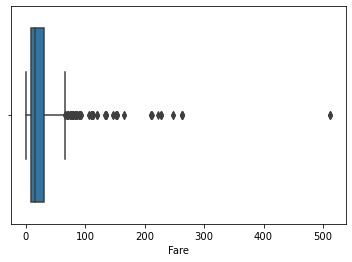

In [11]:
sns.boxplot(df['Fare'])

In [12]:
df = df[df['Fare'] <= 80] #drop the records with outliers in the fare above 80 for more accurate predictions and fitting

<AxesSubplot:xlabel='Survived', ylabel='count'>

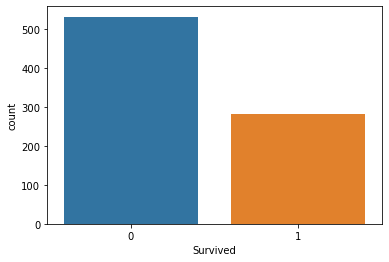

In [13]:
sns.countplot(x='Survived', data=df)

Since the target variable 'Survived' is a binary variable, I will implement the logistic regression model to the dataset.

In [14]:
X= df.iloc[:, 1:5].values
X

array([[ 3.    ,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    , 71.2833,  1.    ],
       [ 3.    ,  1.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  1.    , 23.45  ,  0.    ],
       [ 1.    ,  0.    , 30.    ,  1.    ],
       [ 3.    ,  0.    ,  7.75  ,  2.    ]])

In [15]:
y = df.iloc[:, 0].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit = logit.fit(X_train, y_train)

In [18]:
y_pred = logit.predict(X_test)
print(y_pred)

[0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1]


In [19]:
print(logit.intercept_)

[0.65613102]


In [20]:
 print(logit.coef_)

[[-0.97060646  2.47700824 -0.00501903  0.36282339]]


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7836734693877551
Confusion Matrix:
[[138  21]
 [ 32  54]]


In [22]:
array = logit.predict([[ 3.,  0.,  50., 2.]]) #if and else to make a prediction about a passenger for their survival rate
if array[0]==0:
    print("Sorry, you would've died")
else:
    print("Congratulations, you would've survived")

Sorry, you would've died
